# Introduction

More and more business are waking up to the value of their data and starting to realize the values of the data in terms of making profit through enhancing marketing productivity, improving customer relationships and building up competitive advantages. Online retailers collected a lot of customer online shopping data by tracking every transaction instantly and accurately. Those valuable data could help online retailers to gain deeper insights in the aspects of product trends, segmentation of customers and targeted personalized advertisements.

With data analysis and business intelligence, we could not only answer questions about how the business performed in the past, but also make predictions and help business make decisions. In this project, we conducted analysis on transactions data of an online shopping website during 2009 and 2011 period. The project answered questions about which products are fast growing and declining, analyzed customer purchase behavior and segmented customers into 4 major clusters, identified how each customer cluster are characterized, and studied products trends of loyal customer cluster.


# Background

Some researchers are working on building business intelligence for small online business by data mining, help them better understanding their customer and buliding a customer-centered marketing strategy. 

Probabilistic and machine learning models are used for customer segmentation, such as recency, frequency, and monetary value (RFM) model, hierarchical clustering, k-means and neural network. A great number of researchers have employed RFM model to determine the level of customers' loyalty. In this method, customers are divided into different groups based on RFM variables. Chen et, al. studied RFM model-based customer segmentation using data mining. On the basis of the RFM model, they segmented customers into groups using the k-means clustering algorithm and decision tree induction. The main characteristics of the consumers in each segment have been clearly identified. Later, they adopted a dynamic systems approach to address the dynamic prediction problem of customer profitability. Based on customer transaction records, RFM score-based time series are generated using cluster analysis. These time series are used to measure and describe customer profitability. 

With the inspiration of Chen's work, we conducted customer segmentation by k-means with more comprehensive customer purchase behavior features including frequency (transaction per month), monetary(amount), customer experience days, shopping hours, products veriety and so on.  

# Exploratory Data Analysis

In this project, the dataset is obtained from UCI Machine Learning Repository. It is a real online retail transaction data set called Online Retail II Data Set: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II.

The data sets contain 1067371 rows, each row represents one product in its transactions. It has 541909 entries, 8 attributes with 5 categorical, 2 numerical and 1 datetime, originally.
* Categorical features:
    * Invoice: invoice ID number 
    * StockCode: product ID number
    * Description: product name
    * Customer ID: customer ID
    * Country: the country of customer
* Numerical features:
    * Quantity: quantity of a product in one transaction
    * Price: price of one product
    * InvoiceDate: date of invoice

By analyzing each feature, it showed **"Customer ID"** had 22.77% missing values and **"Description"** had 0.41% missing values.

The total unique number of users is 5942, and total transaction is 53628 (the total number of unique Invoice number). All those transactions were distributed in 43 different countries, where most transactions happened in UK, followed by EIRE, Germany and France. The most popular product is "WHITE HANGING HEART T-LIGHT HOLDER", which appeared in 5918 transactions
	
Based on descriptive results, there are several issues. There is "nan" in the data sets, we need to replace them as NaN. The unique number of Description is more than the StockCode, so we need to check what the data looks like in the Description column. Therefore, we identified all the StockCode with more than one description and print out all the descriptions. There are negative numbers in the columns of quantity and price, which are other types of transaction including return, amazon fee, bank fee, bad debt and etc. Entries with negtive values were dropped.



In [351]:
import pandas as pd
#from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import xlrd, os
from datetime import datetime
import pycountry
import numpy as np
import seaborn as sns
from time import time
import numpy as np
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import plotly.graph_objects as go
import plotly

import plotly.express as px

plotly.offline.init_notebook_mode(connected=True)
pd.set_option("display.max_columns",100)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder

random.seed(42)

In [2]:
# Give the location of the file 
data=pd.ExcelFile("/root/shared/Documents/INFO I590 Applied Data Science/Final Project/DataScienceProject/Code/online_retail_II.xlsx")
#data=pd.ExcelFile("/home/ec2-user/SageMaker/DataScienceProject/online_retail_II.xlsx")
dfs = {sheet: data.parse(sheet) for sheet in data.sheet_names}

In [3]:
data.sheet_names 

['Year 2009-2010', 'Year 2010-2011']

In [4]:
# Access to a worksheet
df2009 = dfs['Year 2009-2010']
df2010 = dfs['Year 2010-2011'] 

In [5]:
retail_all_df = pd.concat([df2009,df2010])
retail_all_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
# Exploratory Data Analysis
#__There are several issues based on above descriptive results :__
#- there are "nan" in the data sets, we need to replace them as NaN.
#- The unique number of Description is more than the StockCode, so we need to check what the data looks like in the Description column. Therefore, we identified all the StockCode with more than one descriptions and print out all the descripitions
#- There are negative numbers in the columns of quantity and price, there might be other types of transaction than sales

retail_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        1067371 non-null object
StockCode      1067371 non-null object
Description    1062989 non-null object
Quantity       1067371 non-null int64
InvoiceDate    1067371 non-null datetime64[ns]
Price          1067371 non-null float64
Customer ID    824364 non-null float64
Country        1067371 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [6]:
### Correct the data type
retail_all_df = retail_all_df.astype({'Invoice':str,'Customer ID':str})

In [13]:
retail_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        1067371 non-null object
StockCode      1067371 non-null object
Description    1062989 non-null object
Quantity       1067371 non-null int64
InvoiceDate    1067371 non-null datetime64[ns]
Price          1067371 non-null float64
Customer ID    1067371 non-null object
Country        1067371 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 73.3+ MB


In [14]:
retail_all_df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,1067371,1067371
unique,53628,5305,5698,NaN,47635,NaN,5943,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,nan,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,243007,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,NaN,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,NaN,NaN


In [7]:
# Replace the "nan" with NaN in the data set
retail_all_df.replace("nan",np.nan, inplace=True)

In [8]:
# Identify all the StockCode with more than one descripitions and print out those different descripitions
uniquedesc = retail_all_df.groupby("StockCode").agg(pd.Series.nunique)[['Description']]
for index, row in uniquedesc[uniquedesc['Description']>1].iterrows():
    print(index, retail_all_df[retail_all_df['StockCode']==index]['Description'].unique())

10080 ['GROOVY CACTUS INFLATABLE' nan 'check']
10120 ['DOGGY RUBBER' 'Zebra invcing error']
10133 ['COLOURING PENCILS BROWN TUBE' 'damaged']
16008 ['SMALL FOLDING SCISSOR(POINTED EDGE)' 'check']
16011 [' ANIMAL STICKERS' 'ANIMAL STICKERS']
16012 ['FOOD/DRINK SPUNGE STICKERS' 'FOOD/DRINK SPONGE STICKERS']
16045 ['POPART WOODEN PENCILS ASST' nan 'check']
16235 ['RECYCLED PENCIL WITH RABBIT ERASER' '?']
17033 ['BROCADE PURSE,SMALL ARCH BUTTON' 'sold as 17003?' 'Sold as 17003?' nan]
20615 ['BLUE SPOTTY PASSPORT COVER' 'BLUE POLKADOT PASSPORT COVER']
20622 ['VIPPASSPORT COVER ' 'VIP PASSPORT COVER ']
20652 ['BLUE SPOTTY LUGGAGE TAG ' nan 'BLUE POLKADOT LUGGAGE TAG ' 'check']
20658 ['RED SPOTTY LUGGAGE TAG' 'RED RETROSPOT LUGGAGE TAG' nan]
20661 ['BLUE SPOTTY PURSE ' 'BLUE POLKADOT PURSE ']
20665 ['RED SPOTTY PURSE ' 'RED RETROSPOT PURSE ' nan 'dotcom' 'adjustment']
20674 ['GREEN SPOTTY BOWL' 'GREEN POLKADOT BOWL']
20675 ['BLUE SPOTTY BOWL' 'BLUE POLKADOT BOWL']
20676 ['RED SPOTTY BOWL' 'RED

21312 ['LARGE CHUNKY GLASS ROMAN BOWL' 'damaged' nan]
21314 ['SMALL GLASS HEART TRINKET POT' '?']
21319 ['GLASS CHALICE GREEN  SMALL ' nan 'adjustment']
21320 ['GLASS CHALICE GREEN  LARGE ' 'broken' nan]
21323 ['HANGING MEDINA LANTERN LARGE' 'damges' nan]
21330 ['WOODLAND ANIMAL  WRITING SET ' '?' nan]
21349 ['IVY HEART WREATH' nan 'check']
21351 ['CINAMMON & ORANGE WREATH' 'damaged']
21352 ['EUCALYPTUS & PINECONE  WREATH' 'check']
21360 ['JOY LARGE WOOD LETTERS' nan 'Show Samples']
21379 [' CAMPHOR WOOD PORTOBELLO MUSHROOM' 'CAMPHOR WOOD PORTOBELLO MUSHROOM']
21391 ['FRENCH EMROIDR LAVENDER SCENT HEART' 'FRENCH LAVENDER SCENT HEART'
 'Sold as 1 on dotcom' nan]
21392 ['RED SPOTTY PUDDING BOWL' 'RED POLKADOT PUDDING BOWL' nan]
21393 ['BLUE  SPOTTY PUDDING BOWL' nan 'BLUE POLKADOT PUDDING BOWL']
21394 ['RED SPOTTY BEAKER ' 'RED POLKADOT BEAKER ' 'damages' nan]
21395 ['BLUE SPOTTY BEAKER ' 'BLUE POLKADOT BEAKER ' nan]
21397 ['BLUE  SPOTTY EGG CUP ' 'BLUE POLKADOT EGG CUP ' 'damaged']
2139

21936 ['RED/WHITE SPOT PICNIC BAG' 'RED RETROSPOT PICNIC BAG']
21937 ['STRAWBERRY   PICNIC BAG' '?' nan 'found']
21955 ['UNION JACK GUNS & ROSES  DOORMAT' '  DOORMAT UNION JACK GUNS AND ROSES'
 'DOOR MAT UNION JACK GUNS AND ROSES' nan
 'DOORMAT UNION JACK GUNS AND ROSES']
21967 ['PACK OF 12 SKULL TISSUES' 'MIA' nan]
21980 ['PACK OF 12 RED SPOTTY TISSUES ' 'PACK OF 12 RED RETROSPOT TISSUES ']
21986 ['PACK OF 12 PINK SPOT TISSUES ' 'PACK OF 12 PINK POLKADOT TISSUES']
21992 ['VINTAGE PAISLEY STATIONERY SET' 'check']
22025 ['RING OF ROSES BIRTHDAY CARD' 'check']
22029 ['SPACE BOY BIRTHDAY CARD' 'SPACEBOY BIRTHDAY CARD']
22030 ['SWALLOWS GREETING CARD' '??']
22033 ['BOTANICAL ROSE GREETING CARD' 'counted' nan]
22035 ['VINTAGE CARAVAN GREETING CARD ' nan 'taig adjust']
22037 ['ROBOT BIRTHDAY CARD' nan 'found again']
22043 ['CHRISTMAS CARD SCREEN PRINT ' 'check' 'dotcom']
22045 ['SPACE BOY GIFT WRAP' 'SPACEBOY GIFT WRAP']
22049 ['WRAP CHRISTMAS SCREEN PRINT' 'damaged']
22051 ['BLUE SCANDINAVI

22359 ['temp' 'GLASS JAR KINGS CHOICE' 'GLASS JAR, KINGS CHOICE SOAP']
22360 ['GLASS JAR, ENGLISH CONFECTIONERY' 'temp'
 'GLASS JAR ENGLISH CONFECTIONERY']
22361 ['temp' 'GLASS JAR DAISY FRESH COTTON WOOL']
22363 ['temp' 'GLASS JAR MARMALADE ']
22365 ['DOORMAT RESPECTABLE HOUSE' 'DOOR MAT RESPECTABLE HOUSE']
22366 ['DOORMAT AIRMAIL ' 'DOOR MAT AIRMAIL ']
22367 ['CHILDS APRON SPACEBOY DESIGN' 'CHILDRENS APRON SPACEBOY DESIGN']
22381 ['TOY TIDY PINK RETROSPOT  ' 'TOY TIDY PINK POLKADOT']
22382 ['LUNCHBAG SPACEBOY DESIGN ' 'LUNCH BAG SPACEBOY DESIGN ']
22383 ['LUNCHBAG SUKI  DESIGN ' 'LUNCH BAG SUKI  DESIGN '
 'LUNCH BAG SUKI DESIGN ']
22384 ['LUNCHBAG PINK RETROSPOT' 'LUNCH BAG PINK RETROSPOT'
 'LUNCH BAG PINK POLKADOT' 'LUNCH BAG PINK POLKADOTS']
22386 ['JUMBO BAG PINK WITH WHITE SPOTS' 'JUMBO BAG PINK POLKADOT']
22405 ['MONEY BOX POCKET MONEY DESIGN' 'TIN CAN POCKET MONEY DESIGN']
22406 ['MONEY BOX KINGS CHOICE DESIGN' 'TIN CAN KINGS CHOICE DESIGN']
22407 ['MONEY BOX FIRST ADE DESIGN' 

22698 ['PINK REGENCY TEACUP AND SAUCER' 'TEACUP AND SAUCER REGENCY PINK' nan]
22699 ['ROSES REGENCY TEACUP AND SAUCER ' 'TEACUP AND SAUCER REGENCY ROSES']
22700 ['BLACK AND WHITE DOG BOWL' 'smashed']
22719 [nan 'GUMBALL COATHOOK., BLACK & WHITE ' 'GUMBALL MONOCHROME COAT RACK'
 22467 'wrong barcode (22467)' 'sold as 22467' 'wrong code']
22731 ['3D CHRISTMAS STAMPS STICKERS ' '3D STICKERS CHRISTMAS STAMPS']
22732 ['3D VINTAGE CHRISTMAS STICKERS ' '3D STICKERS VINTAGE CHRISTMAS']
22733 ['3D STICKERS TRADITIONAL CHRISTMAS ' '3D TRADITIONAL CHRISTMAS STICKERS']
22734 ['SET OF 6 RIBBONS VINTAGE CHRISTMAS'
 'Carton qnty was 216 not 144 as stat' nan 'amazon adjustment' 'amendment'
 'amazon' 'amazon sales' 'FOUND']
22736 ['RIBBON REEL, MAKING SNOWMEN ' 'RIBBON REEL MAKING SNOWMEN ']
22739 ['RIBBON REEL, XMAS SOCK/BAUBLE' 'RIBBON REEL CHRISTMAS SOCK BAUBLE']
22740 ['POLKA DOT PEN' 'POLKADOT PEN' 'POLKADOT PENS' '?' nan 'adjustment']
22759 [nan 'SET OF 3 NOTEBOOKS IN PARCEL' 'check' 'found']
227

22984 ['CARD, GINGHAM ROSE ' 'CARD GINGHAM ROSE ']
22985 ['WRAP, BILLBOARD FONTS DESIGN' 'WRAP BILLBOARD FONTS DESIGN']
22986 ['GINGHAM ROSE WRAP' 'WRAP GINGHAM ROSE ']
22987 ['WRAP , SUMMER ROSE DESIGN' 'WRAP SUMMER ROSE DESIGN']
22999 ['TRAVEL CARD WALLET RETRO PETALS' 'TRAVEL CARD WALLET VINTAGE LEAF']
23003 ['TRAVEL CARD WALLET VINTAGE ROSE ' 'Printing smudges/thrown away']
23005 ['TRAVEL CARD WALLET I LOVE LONDON' 'printing smudges/thrown away']
23015 ['CORDIAL GLASS JUG' 'CORDIAL JUG']
23020 ['GLASS  SONGBIRD STORAGE JAR' 'GLASS SONGBIRD STORAGE JAR' 'smashed']
23028 ['DRAWER KNOB CRACKLE GLAZE BLUE' 'DOORKNOB CRACKED GLAZE BLUE' nan]
23029 ['DRAWER KNOB CRACKLE GLAZE GREEN' 'DOORKNOB CRACKED GLAZE GREEN'
 'damages']
23031 ['DRAWER KNOB CRACKLE GLAZE PINK' 'DOORKNOB CRACKED GLAZE PINK']
23032 ['DRAWER KNOB CRACKLE GLAZE IVORY' 'DOORKNOB CRACKED GLAZE IVORY'
 'damages']
23035 ['DRAWER KNOB CERAMIC IVORY' 'DOORKNOB CERAMIC IVORY' 'check']
23040 ['PAPER LANTERN 9 POINT SNOW STAR ' '

23390 ['DOLLY GIRL MINI BACKPACK' 'DOLLY GIRL MINI RUCKSACK']
23391 [' I LOVE LONDON MINI BACKPACK' ' I LOVE LONDON MINI RUCKSACK']
23395 ['BELLE JARDINIERE CUSHION COVER' 'check']
23396 ['BUTTERFLY CUSHION COVER' 'LA JARDIN BOTANIQUE CUSHION COVER'
 'LE JARDIN BOTANIQUE CUSHION COVER']
23397 ['FOOT STOOL HOME SWEET HOME ' 'damaged']
23400 ['SHELF WITH 4 HOOKS HOME SWEET HOME' 'check' nan]
23402 ['HOME SWEEET HOME 3 PEG HANGER ' 'HOME SWEET HOME 3 PEG HANGER ']
23404 ['HOME SWEET HOME BLACKBOARD' 'check']
23406 ['HOME SWEET HOME KEY HOLDER' 'CHECK' nan]
23412 ['HEART MIRROR ANTIQUE WHITE' '?' nan]
23413 ['VINTAGE COFFEE GRINDER BOX' 'DECROTIVEVINTAGE COFFEE GRINDER BOX'
 'DECORATIVE VINTAGE COFFEE  BOX']
23427 ['STOOL HOME SWEET HOME ' 'damaged']
23436 ['GIFT BAG LARGE VINTAGE CHRISTMAS' 'VINTAGE CHRISTMAS GIFT BAG LARGE ']
23437 [" 50'S CHRISTMAS GIFT BAG LARGE" "GIFT BAG LARGE 50'S CHRISTMAS"]
23438 [' RED SPOT GIFT BAG LARGE' 'GIFT BAG LARGE SPOT ']
23454 ['SET OF 3 MINI HANGING POR

84367 ['LA STREGA CANVAS PICTURE ' 'crushed']
84422 ['PINK/BLUE DISC/MIRROR STRING' 'Dagamed']
84454 ['WOBBLING METAL CHICKEN EASTER' 'missing' nan]
84576 ['BLUE CAT BISCUIT BARREL PINK HEART' nan 'damaged']
84578 ['ELEPHANT TOY WITH BLUE T-SHIRT' 'damages']
84581 ['DOG TOY WITH PINK CROCHET SKIRT' 'check' nan]
84584 ['PINK GINGHAM CAT WITH SCARF' '?' nan]
84598 ['BOYS ALPHABET IRON ON PATCHES' 'check']
84609 ['TALL ROCOCO CANDLE HOLDER' 'damages']
84617 [' NEW BAROQUE BLACK BOXES' 'NEW BAROQUE BLACK BOXES']
84665 ['SQUARE CHERRY BLOSSOM CABINET' 'water damaged']
84670 ['JAPANESE CROCHETED ANIMAL' 'missing' nan]
84680 ['CLASSICAL ROSE URN' 'damages?' nan]
84691 ['PACK 20 DOLLY PEGS' 'damages' nan]
84763 ['ZINC FINISH 15CM PLANTER POTS' 'Display' nan]
84807 ['RED POPPY ARTIFICIAL FLOWER' 'display' 'damages']
84816 ['DANISH ROSE BEDSIDE CABINET' 'damages']
84818 ['DANISH ROSE PHOTO FRAME' 'damages']
84828 ['JUNGLE POPSICLES ICE LOLLY HOLDERS' 'JUNGLE POPSICLES ICE LOLLY MOULDS']
84839 ['

46000S ['POLYESTER FILLER PAD 40x40cm' nan 'Dotcom sales' 'Dotcom' 'dotcom sales']
46000U ['POLYESTER FILLER PAD 30CMx30CM' nan 'dotcom' 'check']
47013A ['WINE BOTTLE DRESSING LT.BLUE' 'damaged']
47310M ['SMALL POP BOX,FUNKY MONKEY' 'SMALL POP BOX FUNKY MONKEY']
47503A ['ASS FLORAL PRINT MULTI SCREWDRIVER' nan 'check']
47503H ['ASS FLORAL PRINT SPIRIT LEVEL ' nan 'check' 'found']
47556B ['TEA TIME TEA TOWELS ' nan 'did  a credit  and did not tick ret']
47566B ['TEA TIME PARTY BUNTING' 'missing' nan 'correct previous adjustment'
 'stock credited from royal yacht inc'
 'incorrectly credited C550456 see 47' 'reverse previous adjustment']
47567B ['TEA TIME KITCHEN APRON' 'missing' nan]
47574A ['ENGLISH ROSE SCENTED HANGING FLOWER' 'check']
47587A ['PINK FAIRY CAKE COASTER' "12'S SOLD AS 1?" nan]
47590B ['PINK HAPPY BIRTHDAY BUNTING' nan 'check']
47591A ["CAROUSEL DES CHILD'S APRON" 'CAROUSEL CHILDRENS APRON' nan]
47591B ["SCOTTIES DES CHILD'S APRON" 'SCOTTIES CHILDRENS APRON' '?' nan]
4759

84800L ['LARGE WHITE/PINK ROSE ART FLOWER' 'wet damaged' nan]
84801A ['PINK HYDRANGEA ART FLOWER' 'wet damaged' 'check']
84804A ['CREAM DELPHINIUM ARTIFICIAL FLOWER' 'wet damaged']
84805A ['CREAM CLIMBING HYDRANGA ART FLOWER' 'wet damaged']
84805B ['BLUE CLIMBING HYDRANGA ART FLOWER' 'wet damaged']
84809B ['PINK CHRYSANTHEMUMS ART FLOWER' 'damaged']
84858A ['NATURAL RIVIERA HANDBAG' 'wet and rotting' nan]
84858B ['BLUE RIVIERA HANDBAG' 'wet & rotting' nan]
84859C ['PINK DISCO HANDBAG' 'wet?']
84875D ['BLUE SQUARE COMPACT MIRROR' nan 'found']
84876B ['GREEN HEART COMPACT MIRROR' nan 'found']
84876D ['BLUE HEART COMPACT MIRROR' 'damaged']
84877D ['BLUE ROUND COMPACT MIRROR' '?' 'found' nan]
84899E ['YELLOW + BROWN BEAR FELT PURSE KIT' 'YELLOW BROWN BEAR FELT PURSE KIT'
 nan]
84912B ['GREEN ROSE WASHBAG' nan 'damaged']
84924D ['LA PALMIERA METAL SIGN CALENDAR' nan 'eurobargain invc/credit']
84925D ['LA PALMIERA WALL THERMOMETER' nan 'incorrect credit']
84925F ['PSYCHEDELIC WALL THERMOMETE

In [14]:
# Look into the negative Quantity and Prices
retail_all_df[retail_all_df['Quantity']<0].sort_values("Quantity")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
303996,519017,22759,NaN,-9600,2010-08-13 09:14:00,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
166349,C505156,22606,WOODEN SKITTLES GARDEN SET,-1,2010-04-20 11:56:00,15.95,17908.0,United Kingdom
387736,C526670,20749,ASSORTED COLOUR MINI CASES,-1,2010-10-12 15:58:00,7.95,13541.0,United Kingdom
150370,C549430,22333,RETROSPOT PARTY BAG + STICKER SET,-1,2011-04-08 12:09:00,1.65,13846.0,United Kingdom
167666,C505226,M,Manual,-1,2010-04-21 10:31:00,847.84,12482.0,Sweden


In [15]:
retail_all_df[retail_all_df['Price']<=0].sort_values("Price")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
221020,510865,90038B,NaN,-19,2010-06-04 09:51:00,0.00,NaN,United Kingdom
221019,510864,90185A,NaN,-19,2010-06-04 09:51:00,0.00,NaN,United Kingdom
221018,510863,90185B,NaN,-46,2010-06-04 09:50:00,0.00,NaN,United Kingdom
219361,510687,46000U,NaN,-15,2010-06-03 10:05:00,0.00,NaN,United Kingdom


In [16]:
## Missing Data
percent = (retail_all_df.isnull().sum()/retail_all_df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = retail_all_df.isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent (%)', "Missing Count"])
missing_data

,Percent (%),Missing Count
Customer ID,22.77,243007
Description,0.41,4382
Country,0.00,0
Price,0.00,0
InvoiceDate,0.00,0
Quantity,0.00,0
StockCode,0.00,0
Invoice,0.00,0


In [9]:
## Examine Features

###  Categorical Features
cat_features = retail_all_df.select_dtypes('object').columns.tolist()
cat_features

['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country']

In [10]:
### Number of unique values for categorical features
retail_all_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Invoice        53628
StockCode       5305
Description     5698
Customer ID     5942
Country           43
dtype: int64

In [11]:
# Data Analysis

## Create new features

# Sales Amount feature
retail_all_df['Amount'] = retail_all_df['Quantity'] * retail_all_df['Price']
# Date and time related features
retail_all_df['Date'] = retail_all_df['InvoiceDate'].dt.date#date
retail_all_df['Time'] = retail_all_df['InvoiceDate'].dt.time#time
retail_all_df['Year'] = retail_all_df['InvoiceDate'].dt.year.astype(str)#the year
retail_all_df['Month'] = retail_all_df['InvoiceDate'].dt.month.astype(str)#the month
retail_all_df['DofM'] = retail_all_df['InvoiceDate'].dt.day.astype(str)#the day
retail_all_df['Weekday'] = retail_all_df['InvoiceDate'].dt.weekday.astype(str)#name of the day of the week
retail_all_df['WofY'] = retail_all_df['InvoiceDate'].dt.week.astype(str)#the week ordinal of the year
retail_all_df['QofY'] = retail_all_df['InvoiceDate'].dt.quarter.astype(str)#quarter of the year
retail_all_df['HofD'] = retail_all_df['InvoiceDate'].dt.hour.astype(str)

In [24]:
retail_all_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Date,Time,Year,Month,DofM,Weekday,WofY,QofY,HofD
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1,1,49,4,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1,1,49,4,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7


In [12]:
## Drop all non sales transcation 
#- Price <= 0 (bad debt, etc..)
#- Quantity <= 0 (return, etc..)
retail_all_df = retail_all_df.drop(retail_all_df[retail_all_df['Price']<=0].index, axis=0)
retail_all_df = retail_all_df.drop(retail_all_df[retail_all_df['Quantity']<=0].index, axis=0)

In [26]:
#Confirmed that the min of Price and Quantity are greater than 0
retail_all_df.describe()

,Quantity,Price,Amount
count,1.016728e+06,1.016728e+06,1.016728e+06
mean,1.096048e+01,4.074341e+00,2.014374e+01
std,1.276314e+02,5.178880e+01,2.053733e+02
min,1.000000e+00,1.000000e-03,1.000000e-03
25%,1.000000e+00,1.250000e+00,3.900000e+00
50%,3.000000e+00,2.100000e+00,9.960000e+00
75%,1.000000e+01,4.130000e+00,1.770000e+01
max,8.099500e+04,2.511109e+04,1.684696e+05


In [27]:
retail_all_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Date,Time,Year,Month,DofM,Weekday,WofY,QofY,HofD
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1,1,49,4,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1,1,49,4,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7


In [13]:
#make data frame of sales by country
df_country=retail_all_df.groupby('Country')[['Quantity','Amount']].agg(sum)


In [14]:
df_country.reset_index(inplace=True)

In [15]:
df_country.sort_values(by='Amount', ascending=False).head(10)

,Country,Quantity,Amount
40,United Kingdom,9163173,1.745141e+07
11,EIRE,335722,6.526223e+05
26,Netherlands,374462,5.407900e+05
15,Germany,222062,4.181699e+05
14,France,271135,3.491462e+05
0,Australia,103565,1.687056e+05
34,Spain,50003,1.073456e+05
36,Switzerland,51948,9.890904e+04
35,Sweden,85462,8.820331e+04
10,Denmark,220204,6.620337e+04


In [169]:
#sales percentage of united kingdom of overall revenue
df_country_sales = df_country.sort_values(by='Amount', ascending=False)
print(df_country_sales[df_country_sales['Country']=='United Kingdom']['Amount']/df_country_sales['Amount'].sum())

40    0.85209
Name: Amount, dtype: float64


In [16]:
# Add Country Codes
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
codes = [countries.get(country, country) for country in df_country['Country']]

df_country['Country_code']=codes

df_country.head()

,Country,Quantity,Amount,Country_code
0,Australia,103565,168705.59,AUS
1,Austria,11312,22894.25,AUT
2,Bahrain,1149,2769.69,BHR
3,Belgium,34441,64097.46,BEL
4,Bermuda,2798,1253.14,BMU


## Mapbox Choropleth Maps about Sales by Countries

In [69]:
# 

fig = go.Figure(data=go.Choropleth(
    locations=df_country['Country_code'], # Replace state names with code
    z = df_country['Amount'].astype(float), 
    colorscale = 'Reds',
    colorbar_title = "USD",
    text = df_country['Country']
))


fig.update_layout(
    title_text = 'Figure 1: Sales Over the World',
    geo_scope="world", 
)

fig.show()

In Figure 1, the dark red area shows most of the sales come from United Kingdom which made 85% of overall revenue. The number of customers from United Kingdom is about 92% of all.

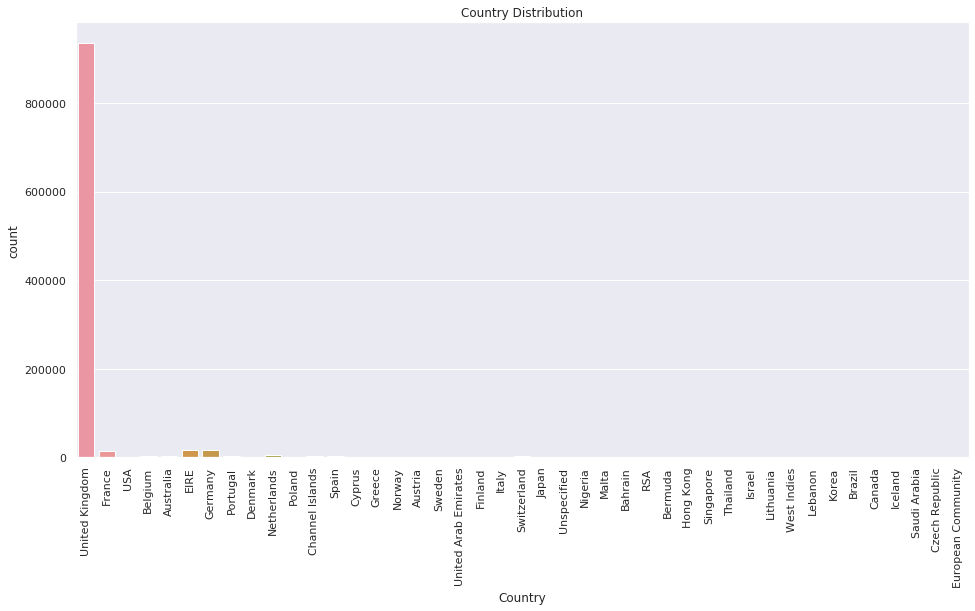

In [71]:
### Distribution of countries
fig = sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='Country', data=retail_all_df)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Country Distribution')
plt.show()

## Remove the United Kingdom to have a better view for rest of countries

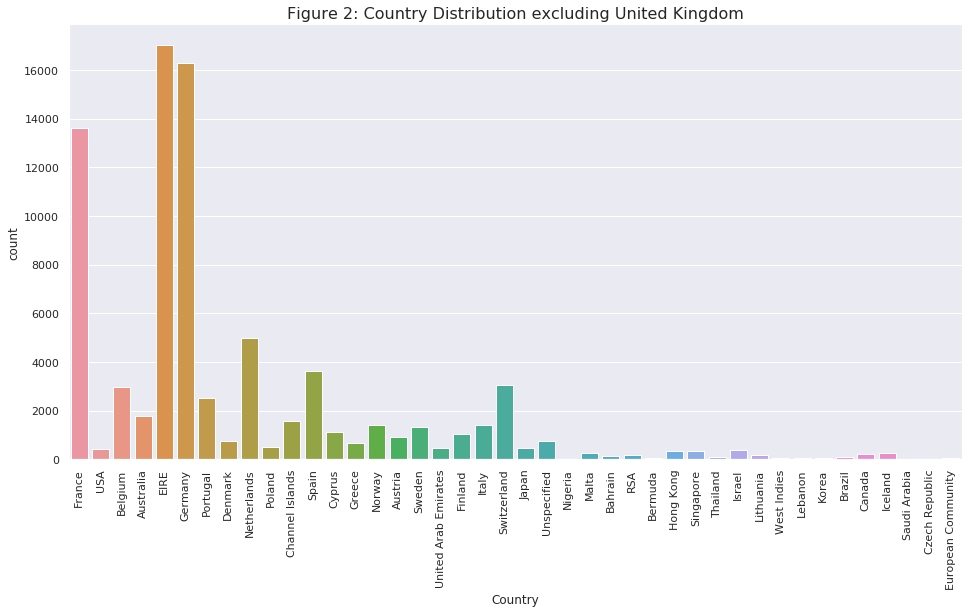

In [166]:
fig = sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='Country', data=retail_all_df[retail_all_df['Country']!="United Kingdom"])
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Figure 2: Country Distribution excluding United Kingdom',Fontsize = 16)
plt.show()

Figure 2 is bar plot of count of customers from other countries except United Kingdom. Most customers are from European area, some are from North and South America, Australia and Asia.

In [21]:
retail_all_df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364,1067371
unique,53628,5305,5698,NaN,47635,NaN,5942,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,17841.0,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,13097,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,NaN,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,NaN,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,NaN,NaN


# Sales Trends Analysis

In this section, we start to look into the sales change by quarter for each product and identify:
- Top 10 fast growing products in sales
- Top 10 fast declining products in sales

We grouped each product and calculate the quarterly sales. Then, we applied linear regression to estimate the increasing/decreasing trend along the quarters. We only calculated the products which have completely 9 quarters data, i.e. 2009Q4 to 2011Q4.

There are 4913 unique products in total.


In [73]:
## Define the regression function for the product
def prod_regr(prodcode, watch='Amount'):

    if watch == 'Amount':
        k = 2
    elif watch == 'Quantity':
        k = 0
    elif watch == 'Price':
        k = 1
    retail_prod_all = retail_all_df[retail_all_df['StockCode']==prodcode]
    prod_df = retail_prod_all.groupby(['Year','QofY'])[['Quantity','Price','Amount']].agg({'Quantity':sum,
                                                                                 'Price':"mean",
                                                                                 'Amount':sum})
    l = prod_df.shape[0]
    amount = prod_df['Amount']
    quantities = prod_df['Quantity']
    prices = prod_df['Price']
    description = retail_prod_all['Description'] 
    reg_np = StandardScaler().fit(prod_df).transform(prod_df)
    reg_df = prod_df.reset_index().reset_index()
    reg = LinearRegression().fit(reg_df[['index']], reg_np[:,k])
    coef = reg.coef_[0]
    
    return l, coef, amount, quantities, prices, description
    


In [74]:
## Identify all the products
prod_list = retail_all_df['StockCode'].unique()

In [75]:
len(prod_list)

4913

In [76]:
## Calculate the sales changing rate through regression analysis
if os.path.exists("prod_df.pkl"):
    prod_df = pd.read_pickle("prod_df.pkl")
else:
    prod_df = pd.DataFrame(columns=['StockCode','Description','Records','Coff'])
    for p in prod_list:
        l, coef, amounts, quantities, prices, description = prod_regr(p)
        prod_df = prod_df.append({'StockCode':p, 'Description':description, 'Records':l, 'Coff':coef}, ignore_index=True)

    prod_df.to_pickle("prod_df.pkl")

## Top 10 Growing Products:

In [77]:
top10_prod_amount=prod_df[prod_df['Records']>=9].sort_values("Coff", ascending=False).head(10)
top10_prod_amount

,StockCode,Description,Records,Coff
685,21891,1253 TRADITIONAL WOODEN SKIPPING ROPE 132...,9,0.358420
141,20724,163 RED SPOTTY CHARLOTTE BAG 1030 ...,9,0.357308
1257,20723,2956 STRAWBERRY CHARLOTTE BAG 3012 S...,9,0.345407
1074,84536A,2286 ENGLISH ROSE NOTEBOOK A7 SIZE 3401 ...,9,0.344013
2443,20839,16802 FRENCH PAISLEY CUSHION COVER 47695 ...,9,0.342893
1062,82583,2265 HOT BATHS METAL SIGN 3030 HOT B...,9,0.338062
916,84536B,1864 FAIRY CAKES NOTEBOOK A7 SIZE 2287 ...,9,0.331451
1306,22101,3180 MIRROR MOSAIC VOTIVE HOLDER 15459 ...,9,0.331303
2832,85204,31065 HANGING WOOD AND FELT FLOWER 50297 ...,9,0.329592
86,POST,89 POSTAGE 126 POSTAGE 173 ...,9,0.327136


In [78]:
i = 0
print("Top 10 Growing Products: ")
for index, row in top10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    
    print(str(np.array(row['Description'])[0]))
    i += 1

Top 10 Growing Products: 
TRADITIONAL WOODEN SKIPPING ROPE
RED SPOTTY CHARLOTTE BAG
STRAWBERRY CHARLOTTE BAG
ENGLISH ROSE NOTEBOOK A7 SIZE
FRENCH PAISLEY CUSHION COVER 
HOT BATHS METAL SIGN
FAIRY CAKES NOTEBOOK A7 SIZE
MIRROR MOSAIC VOTIVE HOLDER
HANGING WOOD AND FELT FLOWER
POSTAGE


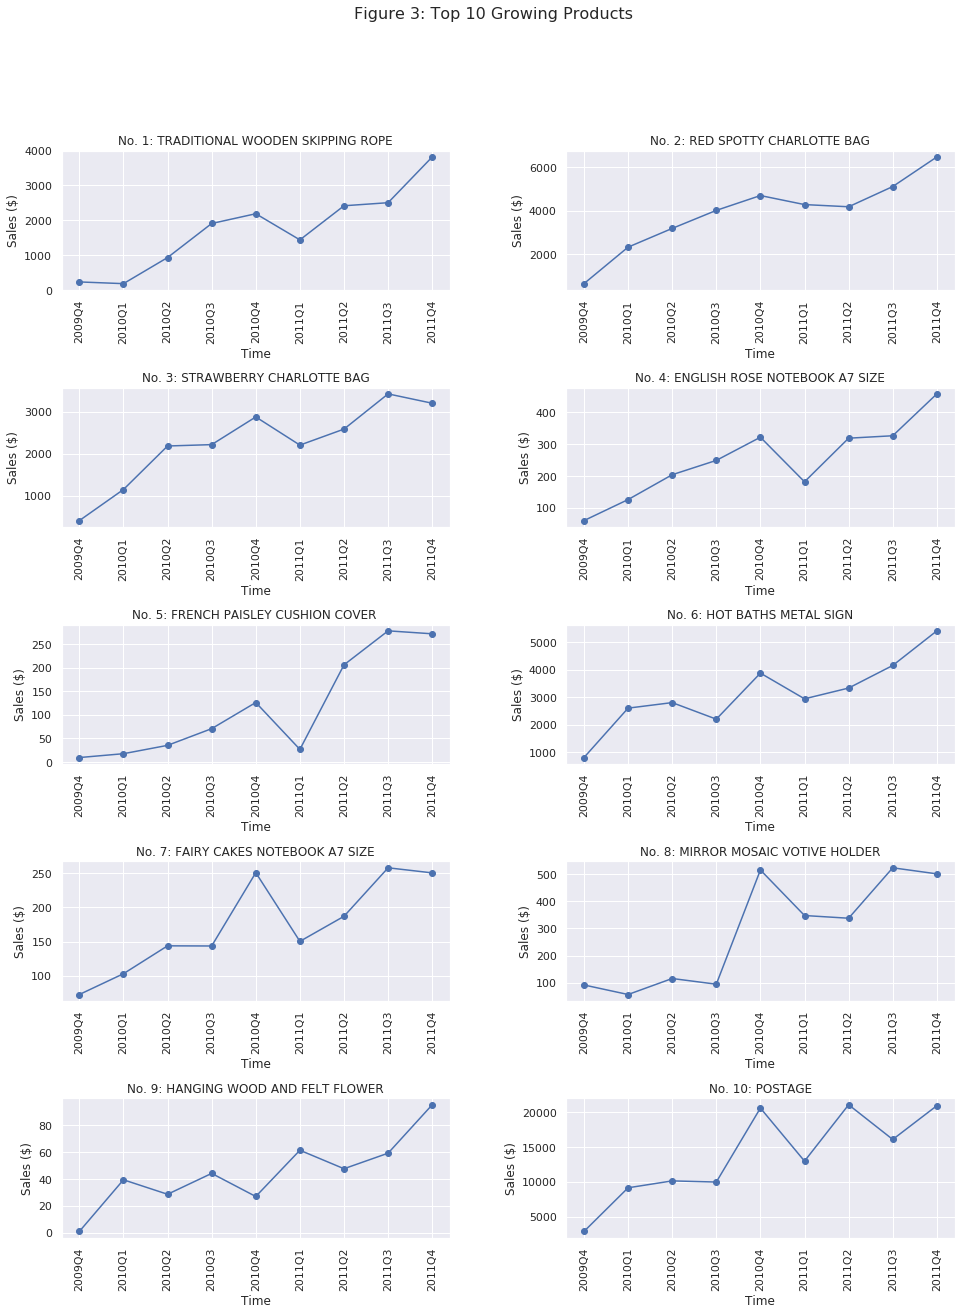

In [354]:
fig, axs = plt.subplots(5,2, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=0.3)
fig.suptitle('Figure 3: Top 10 Growing Products', fontsize=16)
axs = axs.ravel()
i = 0
for index, row in top10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    fig = axs[i].plot(amount.values, 'bo-')
    axs[i].set_xticklabels(("","2009Q4","2010Q1","2010Q2","2010Q3","2010Q4","2011Q1","2011Q2","2011Q3","2011Q4"),
                           rotation='vertical')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Sales ($)')
    axs[i].set_title(f"No. {i+1}: {str(np.array(row['Description'])[0])}")
    i += 1
plt.show()

## Bottom 10 Declining Products:

In [90]:
bottom10_prod_amount=prod_df[prod_df['Records']>=9].sort_values("Coff", ascending=True).head(10)
bottom10_prod_amount

,StockCode,Description,Records,Coff
591,21126,993 SET OF 6 GIRLS CELEBRATION CANDLES 3...,9,-0.367944
2315,90060F,13729 FIRE POLISHED GLASS NECKL GREEN 3720...,9,-0.320747
528,21579,830 LOLITA DESIGN COTTON TOTE BAG 852 ...,9,-0.320284
1273,22214,3051 CANDLE PLATE LACE WHITE 27615 CA...,9,-0.309355
197,21706,"267 FOLDING UMBRELLA , RED/WHITE SPOT ...",9,-0.302649
2291,72780,13364 BLACK SILOUETTE CANDLE PLATE 22045 ...,9,-0.298878
1713,84712B,5582 PINK JEWELLED PHOTO FRAME 9864 ...,9,-0.296563
1793,21555,6262 CERAMIC STRAWBERRY TRINKET TRAY 1115...,9,-0.296361
5,22064,5 PINK DOUGHNUT TRINKET POT 84 ...,9,-0.295998
234,37449,333 CERAMIC CAKE STAND + HANGING CAKES 1...,9,-0.294657


In [91]:
i = 0
print("Bottom 10 Declining Products: ")
for index, row in bottom10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    
    print(str(np.array(row['Description'])[0]))
    i += 1

Bottom 10 Declining Products: 
SET OF 6 GIRLS CELEBRATION CANDLES
FIRE POLISHED GLASS NECKL GREEN
LOLITA  DESIGN  COTTON TOTE BAG
CANDLE PLATE LACE WHITE
FOLDING UMBRELLA , RED/WHITE SPOT
BLACK SILOUETTE CANDLE PLATE
PINK JEWELLED PHOTO FRAME
CERAMIC STRAWBERRY TRINKET TRAY
PINK DOUGHNUT TRINKET POT 
CERAMIC CAKE STAND + HANGING CAKES


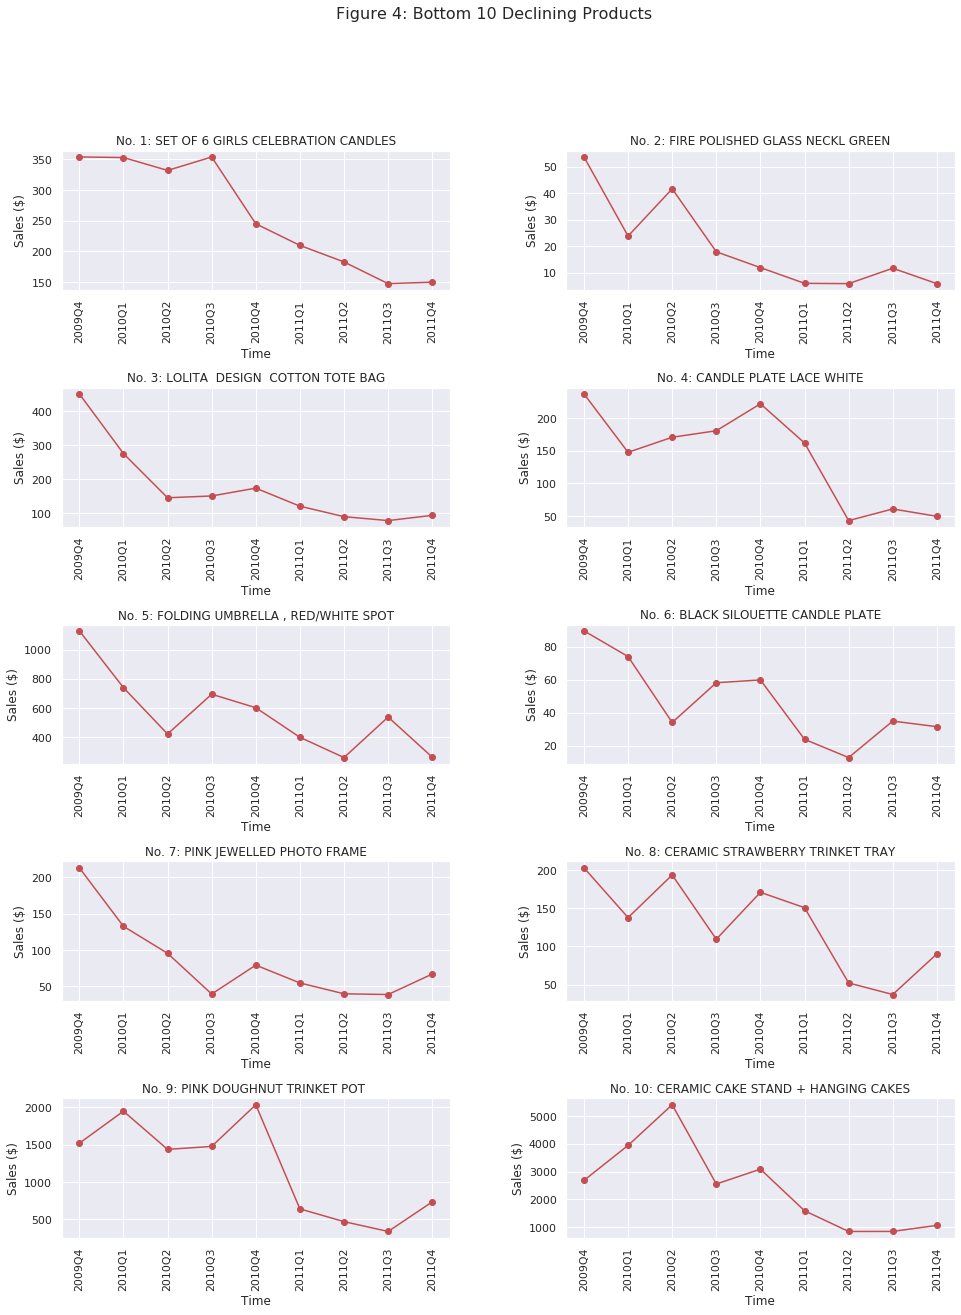

In [355]:
fig, axs = plt.subplots(5,2, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=0.3)
fig.suptitle('Figure 4: Bottom 10 Declining Products', fontsize=16)
axs = axs.ravel()
i = 0
for index, row in bottom10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    a = axs[i].plot(amount.values, 'ro-')
    axs[i].set_xticklabels(("","2009Q4","2010Q1","2010Q2","2010Q3","2010Q4","2011Q1","2011Q2","2011Q3","2011Q4"),
                           rotation='vertical')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Sales ($)')
    axs[i].set_title(f"No. {i+1}: {str(np.array(row['Description'])[0])}")
    i += 1
plt.show()

# Custom Segmentation

## Customer Classification by K-means 

The variables are not on comparable scales, and the value ranges are quite different. As such, we used StandardScaler to normalize variables before the KMeans clustering analysis. Four major clusters are identified with each cluster contains more than 100 customers. Those four clusters have about 99.45% of the total customer and the sales is about 88.13% of the total revenue.

In [24]:
customer_trans_df = retail_all_df.dropna(subset=["Customer ID"])

customer_trans_df.head()

customer_trans_df = customer_trans_df.astype({'HofD':int})

customer_df = customer_trans_df.groupby("Customer ID").agg({"Invoice":['count',pd.Series.nunique],
                                              "StockCode":[pd.Series.nunique],
                                              "Quantity":['min','max','mean','sum'],
                                              "Price":['min','max','mean','std'],
                                              "Amount":['min','max','mean','std','sum'],
                                              "Date":['min','max',pd.Series.nunique],
                                              "HofD":['min','max','mean','std'],
                                              "Month":['count', pd.Series.mode,pd.Series.nunique],
                                              "Weekday":['count', pd.Series.mode,pd.Series.nunique],
                                              "WofY":['count', pd.Series.mode,pd.Series.nunique],
                                              "QofY":['count', pd.Series.mode,pd.Series.nunique],
                                              "HofD":['min','max','mean','std'],
                                              "Country":['count', pd.Series.mode,pd.Series.nunique],
                                                           })

customer_df['ExperienceDays'] = (customer_df['Date','max'] - customer_df['Date','min']).dt.days

customer_df.drop(('Date','min'),axis=1, inplace=True)
customer_df.drop(('Date','max'),axis=1, inplace=True)


customer_df.dropna(inplace=True)

The variables are not on comparable scales, and the value ranges are quite different. As such, we used StandardScaler to normalize viriables before the KMeans clustering analysis.

In [25]:
## Classification by KMeans

# customer_df customer table 
customer_df.columns = customer_df.columns.map('|'.join).str.strip('|')

columns = customer_df.columns.to_list()

num_features = customer_df.select_dtypes(include=['float64', 'int']).columns.tolist()

cat_feature = customer_df.select_dtypes(include=['object']).columns.tolist()

In [32]:
#X_scaled only has numerical data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[num_features])

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_scaled)

In [40]:
X_scaled=pd.DataFrame(X_scaled,columns=customer_df[num_features].columns)

X_scaled.head()

,Invoice|count,Invoice|nunique,StockCode|nunique,Quantity|min,Quantity|max,Quantity|mean,Quantity|sum,Price|min,Price|max,Price|mean,Price|std,Amount|min,Amount|max,Amount|mean,Amount|std,Amount|sum,Date|nunique,HofD|min,HofD|max,HofD|mean,HofD|std,Month|count,Month|nunique,Weekday|count,Weekday|nunique,WofY|count,WofY|nunique,QofY|count,QofY|nunique,Country|count,Country|nunique,ExperienceDays
0,-0.293633,0.432364,-0.477441,-0.110513,70.208735,24.294964,8.279580,-0.009819,-0.100341,0.007001,-0.076351,-0.086666,63.237450,10.320270,37.994095,5.167979,0.228858,-1.313100,-0.609018,-0.232249,0.291221,-0.293633,0.136796,-0.293633,0.803466,-0.293633,0.174095,-0.293633,0.653374,-0.293633,-0.047569,0.470625
1,0.293453,0.125504,0.369288,-0.072026,0.125122,-0.062953,0.154468,-0.017980,-0.080337,-0.030549,-0.070448,-0.047364,0.078879,-0.048733,-0.024447,0.161414,0.228858,-1.313100,0.230313,0.033067,0.781922,0.293453,0.821432,0.293453,1.417529,0.293453,0.341587,0.293453,1.513290,0.293453,-0.047569,0.478360
2,-0.264995,-0.181355,-0.494721,-0.110513,0.034172,0.327596,0.035907,-0.017545,0.023298,-0.030213,0.066095,-0.086666,0.070998,0.032232,0.052730,-0.084484,-0.169860,-0.427705,1.908975,1.603576,1.807221,-0.264995,-0.205521,-0.264995,0.803466,-0.264995,-0.160889,-0.264995,0.653374,-0.264995,-0.047569,0.327524
3,0.095849,-0.258070,0.464330,-0.110513,-0.056778,-0.107131,-0.025887,-0.016130,1.012107,0.021481,0.545475,-0.031799,0.120255,-0.038468,0.006402,0.081718,-0.269539,-1.313100,-0.609018,-1.611598,0.813229,0.095849,-0.205521,0.095849,-0.424662,0.095849,-0.328381,0.095849,-0.206541,0.095849,-0.047569,1.131984
4,-0.359502,-0.411500,-0.615683,0.081919,-0.079515,-0.072109,-0.189794,-0.011451,-0.117608,-0.040265,-0.103766,-0.013705,-0.105341,-0.068501,-0.068698,-0.192254,-0.468898,2.228480,0.649979,1.884738,-1.159464,-0.359502,-0.890157,-0.359502,-1.038725,-0.359502,-0.663365,-0.359502,-1.066456,-0.359502,-0.047569,-1.076414


In [41]:
### Cluster summary

customer_df_cluster = customer_df.copy()

# customer_df_cluster customer table with cluster
customer_df_cluster['cluster']=kmeans.predict(X_scaled)

In [44]:
# find the number of customers in each cluster
n_customers=[]
for i in range(0,10):
    l = len(customer_df_cluster[customer_df_cluster['cluster']==i])
    n_customers.append([i,l])
print(pd.DataFrame(n_customers, columns=["Cluster","Number of Customers"]))

   Cluster  Number of Customers
0        0                 1611
1        1                 2132
2        2                    8
3        3                 1632
4        4                    1
5        5                    1
6        6                  351
7        7                    4
8        8                    1
9        9                   17


In [45]:
# find the most 4 clusters with customer more than 100
cluster_n_customers = []
cluster_total_spending = []
for i in range(0,10):
    if (len(customer_df_cluster[customer_df_cluster['cluster']==i]))>100:
        cluster_n_customers.append(len(customer_df_cluster[customer_df_cluster['cluster']==i]))
        cluster_total_spending.append(sum(customer_df_cluster[customer_df_cluster['cluster']==i]['Amount|sum']))
        print(f"cluster{i} contains {len(customer_df_cluster[customer_df_cluster['cluster']==i])} customers")

cluster0 contains 1611 customers
cluster1 contains 2132 customers
cluster3 contains 1632 customers
cluster6 contains 351 customers


In [46]:
customer_df_cluster[customer_df_cluster['cluster']==0].describe()

,Invoice|count,Invoice|nunique,StockCode|nunique,Quantity|min,Quantity|max,Quantity|mean,Quantity|sum,Price|min,Price|max,Price|mean,Price|std,Amount|min,Amount|max,Amount|mean,Amount|std,Amount|sum,Date|nunique,HofD|min,HofD|max,HofD|mean,HofD|std,Month|count,Month|nunique,Weekday|count,Weekday|nunique,WofY|count,WofY|nunique,QofY|count,QofY|nunique,Country|count,Country|nunique,ExperienceDays,cluster
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.0
mean,39.499069,2.004966,34.126629,4.250155,51.681564,15.303560,391.127871,0.707705,16.500180,3.614658,3.670719,10.271454,79.955841,26.688196,18.327309,658.035011,1.906269,10.221601,11.695841,10.935035,0.614943,39.499069,1.715084,39.499069,1.622595,39.499069,1.860956,39.499069,1.457480,39.499069,1.000621,115.465549,0.0
std,42.177963,1.175305,32.921421,13.390091,84.413680,31.038655,483.211361,1.243514,45.123578,5.878840,7.481242,22.928929,137.261852,44.560838,39.776804,689.121978,1.052311,1.281470,1.719628,1.220889,0.791126,42.177963,0.847438,42.177963,0.755328,42.177963,1.015059,42.177963,0.614442,42.177963,0.024915,161.562327,0.0
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.001000,0.400000,0.280000,0.000000,0.001000,4.250000,2.186311,0.000000,6.200000,1.000000,6.000000,7.000000,7.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.0
25%,12.000000,1.000000,12.000000,1.000000,20.000000,6.272727,124.500000,0.290000,6.750000,2.201822,1.685371,2.520000,29.850000,13.981439,5.205010,238.985000,1.000000,9.000000,10.500000,10.000000,0.000000,12.000000,1.000000,12.000000,1.000000,12.000000,1.000000,12.000000,1.000000,12.000000,1.000000,0.000000,0.0
50%,26.000000,2.000000,25.000000,2.000000,25.000000,9.633333,255.000000,0.420000,9.950000,3.029882,2.593691,6.800000,41.600000,17.271818,8.464237,446.180000,2.000000,10.000000,12.000000,11.000000,0.241245,26.000000,2.000000,26.000000,1.000000,26.000000,2.000000,26.000000,1.000000,26.000000,1.000000,28.000000,0.0
75%,50.000000,3.000000,45.000000,2.000000,48.000000,13.987500,484.500000,0.850000,14.950000,4.009888,3.625890,10.200000,81.060000,23.197083,16.648795,838.025000,2.000000,11.000000,13.000000,12.000000,1.030690,50.000000,2.000000,50.000000,2.000000,50.000000,2.000000,50.000000,2.000000,50.000000,1.000000,190.500000,0.0
max,356.000000,10.000000,255.000000,200.000000,1200.000000,735.428571,6478.000000,34.950000,1136.300000,208.316667,150.139938,330.000000,2970.750000,644.537143,775.744794,8438.340000,7.000000,12.000000,17.000000,14.326923,3.940737,356.000000,6.000000,356.000000,5.000000,356.000000,7.000000,356.000000,4.000000,356.000000,2.000000,720.000000,0.0


In [47]:
customer_df_cluster[customer_df_cluster['cluster']==3].describe()

,Invoice|count,Invoice|nunique,StockCode|nunique,Quantity|min,Quantity|max,Quantity|mean,Quantity|sum,Price|min,Price|max,Price|mean,Price|std,Amount|min,Amount|max,Amount|mean,Amount|std,Amount|sum,Date|nunique,HofD|min,HofD|max,HofD|mean,HofD|std,Month|count,Month|nunique,Weekday|count,Weekday|nunique,WofY|count,WofY|nunique,QofY|count,QofY|nunique,Country|count,Country|nunique,ExperienceDays,cluster
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.0
mean,43.639706,1.841912,38.094975,2.869485,47.977941,11.675397,337.031863,1.157123,20.438848,4.566295,4.659618,7.644665,73.256287,21.347284,16.687361,571.943299,1.740196,13.699755,14.974877,14.390572,0.525442,43.639706,1.575980,43.639706,1.509804,43.639706,1.702819,43.639706,1.364583,43.639706,1.001225,101.938113,3.0
std,47.569538,1.072827,37.976939,9.247639,134.142862,21.852734,411.865546,11.607708,117.901938,24.975043,25.911422,23.590881,193.618289,44.709728,46.625404,713.864760,0.955748,1.634409,1.442537,1.270165,0.761526,47.569538,0.774588,47.569538,0.710715,47.569538,0.920796,47.569538,0.562508,47.569538,0.034996,160.055138,0.0
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.001000,0.750000,0.358000,0.000000,0.001000,5.100000,2.017619,0.000000,13.300000,1.000000,9.000000,13.000000,11.313433,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,3.0
25%,14.000000,1.000000,13.750000,1.000000,16.000000,4.082386,110.750000,0.290000,7.500000,2.194932,1.744305,0.850000,25.500000,7.934910,5.019333,208.455000,1.000000,13.000000,14.000000,13.277826,0.000000,14.000000,1.000000,14.000000,1.000000,14.000000,1.000000,14.000000,1.000000,14.000000,1.000000,0.000000,3.0
50%,28.000000,1.000000,26.000000,1.000000,25.000000,8.211111,218.000000,0.420000,10.950000,2.897875,2.532759,4.560000,39.075000,15.369073,7.683851,374.180000,1.000000,14.000000,15.000000,14.000000,0.000000,28.000000,1.000000,28.000000,1.000000,28.000000,1.000000,28.000000,1.000000,28.000000,1.000000,0.000000,3.0
75%,55.000000,2.000000,49.000000,2.000000,48.000000,12.177807,420.500000,0.790000,15.000000,3.805848,3.479755,9.900000,69.165000,20.228318,14.412922,707.342500,2.000000,15.000000,16.000000,15.000000,0.976688,55.000000,2.000000,55.000000,2.000000,55.000000,2.000000,55.000000,2.000000,55.000000,1.000000,155.000000,3.0
max,520.000000,8.000000,393.000000,200.000000,4300.000000,363.000000,6199.000000,311.990000,4161.060000,751.490000,837.143718,590.000000,4161.060000,751.490000,837.143718,12601.830000,8.000000,20.000000,20.000000,20.000000,4.060154,520.000000,5.000000,520.000000,6.000000,520.000000,7.000000,520.000000,4.000000,520.000000,2.000000,731.000000,3.0


In [48]:
def bulid_cluster_feature_summary(cluster_list):
    frames_num = []
    frames_cat = []
    for cluster in cluster_list:
        num_summary = customer_df_cluster[customer_df_cluster['cluster']==cluster].agg({"Invoice|count":'mean',
                                                                             "Invoice|nunique":'mean',
                                                                             "HofD|min":['mean'],
                                                                             "HofD|max":['mean'],
                                                                             "Amount|sum":['mean'],
                                                                             "ExperienceDays":['mean']
                                                                            })

        cat_summary = customer_df_cluster[customer_df_cluster['cluster']==cluster].agg({"Month|mode":['mode'],
                                                                             "Weekday|mode":['mode'],
                                                                             "WofY|mode":['mode'],
                                                                             "QofY|mode":['mode'],
                                                                            })
        num_summary = num_summary.reset_index().drop(['index'],axis=1)
        cat_summary = cat_summary.reset_index().drop(['index'],axis=1) 
        cat_summary.columns = ["Month|mode", "Weekday|mode","WofY|mode", "QofY|mode"]
        
        frames_num.append(num_summary)
        frames_cat.append(cat_summary)
       
    cluster_num_summary=pd.concat(frames_num)
    cluster_cat_summary=pd.concat(frames_cat)
    return cluster_num_summary, cluster_cat_summary
        
        

In [61]:
cluster_list = [0,1,3,6]
cluster_num_summary, cluster_cat_summary = bulid_cluster_feature_summary(cluster_list)

cluster_num_summary.head()

,Invoice|count,Invoice|nunique,HofD|min,HofD|max,Amount|sum,ExperienceDays
0,39.499069,2.004966,10.221601,11.695841,658.035011,115.465549
0,157.579737,8.066604,9.732645,15.724672,2969.960801,473.787523
0,43.639706,1.841912,13.699755,14.974877,571.943299,101.938113
0,741.433048,31.948718,9.239316,16.840456,19235.382487,647.871795


In [62]:
cluster_num_summary['HofD_range'] = cluster_num_summary['HofD|max'] - cluster_num_summary['HofD|min']
cluster_num_summary['Transaction_per_month'] = cluster_num_summary['Invoice|count']/25
cluster_num_summary.drop(['HofD|min','HofD|max'], axis=1,inplace=True)

cluster_num_summary_trans = cluster_num_summary.transpose()
cluster_num_summary_trans.reset_index(inplace=True)
cluster_num_summary_trans.columns = ['Features', 'cluster0', 'cluster1','cluster3','cluster6']

cluster_num_summary_trans=cluster_num_summary_trans.melt('Features')

cluster_num_summary_trans['value']=pd.to_numeric(cluster_num_summary_trans['value'])

cluster_num_summary_trans.columns=['Features','cluster','value']

cluster_num_summary_trans

,Features,cluster,value
0,Invoice|count,cluster0,39.499069
1,Invoice|nunique,cluster0,2.004966
2,Amount|sum,cluster0,658.035011
3,ExperienceDays,cluster0,115.465549
4,HofD_range,cluster0,1.474240
5,Transaction_per_month,cluster0,1.579963
6,Invoice|count,cluster1,157.579737
7,Invoice|nunique,cluster1,8.066604
8,Amount|sum,cluster1,2969.960801
9,ExperienceDays,cluster1,473.787523


In [63]:
cluster_cat_summary_trans = cluster_cat_summary.transpose()
cluster_cat_summary_trans.reset_index(inplace=True)
cluster_cat_summary_trans.columns = ['Features', 'cluster0', 'cluster1','cluster3','cluster6']

cluster_cat_summary_trans=cluster_cat_summary_trans.melt('Features')
cluster_cat_summary_trans['value']=pd.to_numeric(cluster_cat_summary_trans['value'])
cluster_cat_summary_trans.columns=['Features','cluster','value']
cluster_cat_summary_trans

,Features,cluster,value
0,Month|mode,cluster0,11
1,Weekday|mode,cluster0,2
2,WofY|mode,cluster0,44
3,QofY|mode,cluster0,4
4,Month|mode,cluster1,11
5,Weekday|mode,cluster1,3
6,WofY|mode,cluster1,49
7,QofY|mode,cluster1,4
8,Month|mode,cluster3,11
9,Weekday|mode,cluster3,3


In [370]:
cluster_customer_summary = pd.concat([cluster_num_summary.reset_index(),cluster_cat_summary.reset_index()], axis=1)
cluster_customer_summary.drop(columns='index',inplace=True)
cluster_customer_summary['cluster'] = ['cluster0', 'cluster1','cluster3','cluster6']

cluster_customer_summary['n_customers_pct'] = np.round_((np.divide(cluster_n_customers,len(customer_df)))*100,2)


cluster_customer_summary['total_spending_pct'] = np.round_((np.divide(cluster_total_spending, customer_df_cluster['Amount|sum'].sum(axis=0)))*100,2)

In [372]:
cluster_customer_summary = round(cluster_customer_summary.set_index('cluster'),2)

cluster_customer_summary

,Invoice|count,Invoice|nunique,Amount|sum,ExperienceDays,HofD_range,Transaction_per_month,Month|mode,Weekday|mode,WofY|mode,QofY|mode,n_customers_pct,total_spending_pct
cluster,,,,,,,,,,,,
cluster0,39.50,2.00,658.04,115.47,1.47,1.58,11,2,44,4,27.98,6.20
cluster1,157.58,8.07,2969.96,473.79,5.99,6.30,11,3,49,4,37.03,37.01
cluster3,43.64,1.84,571.94,101.94,1.28,1.75,11,3,46,4,28.34,5.46
cluster6,741.43,31.95,19235.38,647.87,7.60,29.66,12,3,49,4,6.10,39.46


In [222]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['cluster', 'n_customers_pct(%)', 'total_spending_pct(%)']),
    cells=dict(values=[cluster_customer_summary['cluster'],
                       cluster_customer_summary['n_customers_pct'],
                       cluster_customer_summary['total_spending_pct']
                                ]))])
fig.update_layout(
    title={'text':'Table 1: Customer Classification Summary',
    'y':0.9,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'})

fig.show()

Figure 5 shows the box plots of categorical features of each customer cluster including month and weekday. For all clusters, more people shop in the late half of the year which maybe a reflection of holiday shopping. Thursdays and Wednesdays are busier than other days.

In [194]:
cluster = customer_df_cluster['cluster']

retail_all_cluster_df=retail_all_df.merge(cluster, on='Customer ID')

retail_all_cluster_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Date,Time,Year,Month,DofM,Weekday,WofY,QofY,HofD,cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1


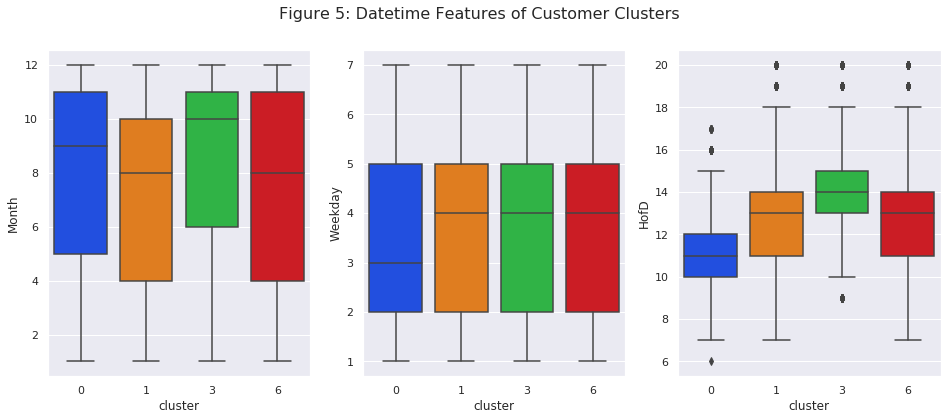

In [364]:
#boxplot about categorical features of customer cluster 
retail_all_cluster_df = retail_all_cluster_df.astype({"Month":'int', 'Weekday':'int', 'HofD':'int'})
retail_all_cluster_df['Weekday'] = retail_all_cluster_df['Weekday']-10
fig, axs = plt.subplots(1,3, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)
fig.suptitle('Figure 5: Datetime Features of Customer Clusters', fontsize=16)
axs = axs.flatten()
sub = []
i = 0
for feature in ["Month","Weekday","HofD"]:
    data=retail_all_cluster_df[retail_all_cluster_df['cluster'].isin(cluster_list)][[feature,'cluster']]
    sns.boxplot(x='cluster', y=feature, data=data,
             palette=sns.color_palette("bright",4),
                ax=axs[i])
    i=i+1


Figure 6 bar plots show frequency (Transaction_per_month), product variety (Invoice|nunique), monetary (Amount|sum) and ExperienceDays of customer clusters.

Cluster 0 are customers with relatively low frequency (transaction per month) and monetary(amount). Every transaction, customers shop around 2 different kinds of products (Invoice|count) on average. They are customers with about 115 experience days. Cluster 0 is about 27.98% of the total customer and they shopped 6.2% of total revenue, shown in Table 1.

Cluster 3 is similar with cluster 0 with a little bit higher shopping frequency and less product variety than cluster 0. Cluster 3 customers have less experience day at about 102 days. Cluster 3 is about 28.34% of the total customer and 5.46% of total revenue, shown in Table 1.

Cluster 1 are customers with high frequency and moderate monetary (on average, every customer spends about 2970 dollars in the studied period). They shop on large variety of products (158 products on every transaction on average) and they are loyal customers with average experience days about 474 days. Cluster 1 is about 37.03% of the total customers and 37.01% of the total revenue, shown in Table 1.

Cluster 6 are customers with high frequency and high monetary. They are loyal customers with about average 648 experience days. Those customers shop for variety products (about 32 products for each transaction) with large quantity.  Cluster 4 is 6.1% of total customers and 39.46% of the total revenue, shown in Table 1.


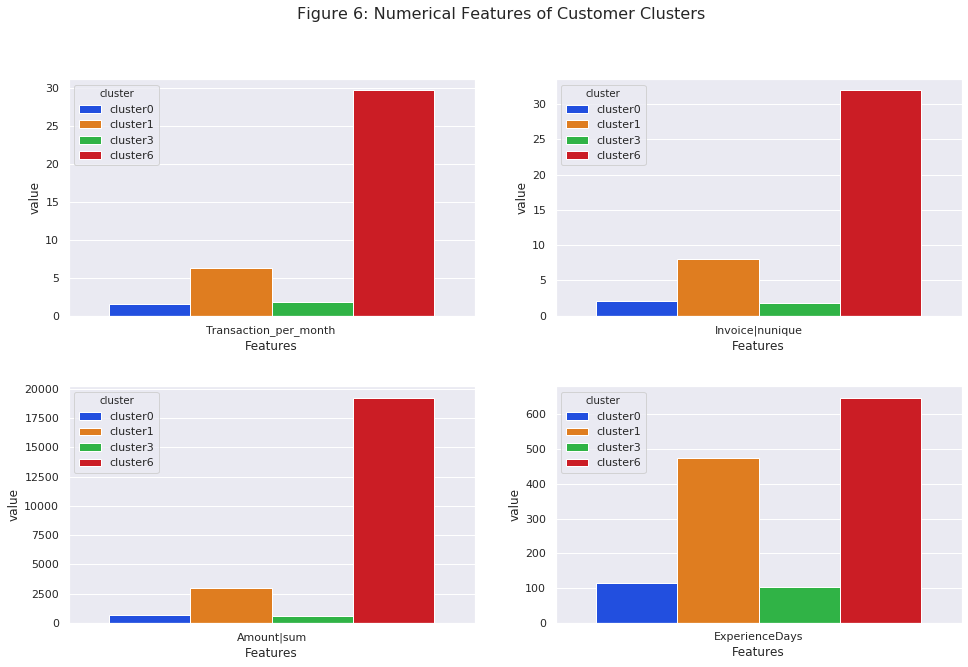

In [357]:
fig, axs = plt.subplots(2,2, figsize=(16, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)
fig.suptitle('Figure 6: Numerical Features of Customer Clusters', fontsize=16)

axs = axs.flatten()
sub = []
i = 0
for feature in ["Transaction_per_month","Invoice|nunique","Amount|sum","ExperienceDays",]:
    data=cluster_num_summary_trans.loc[cluster_num_summary_trans["Features"] == feature]
    sns.barplot(x="Features",y="value", hue="cluster", data=data,
             palette=sns.color_palette("bright", 4),ax=axs[i])
    i=i+1
    

To further investigate the difference between cluster 0 and cluster 3, histograms were ploted in Figure 7. Cluster 0 shops more lower price products than cluster3.

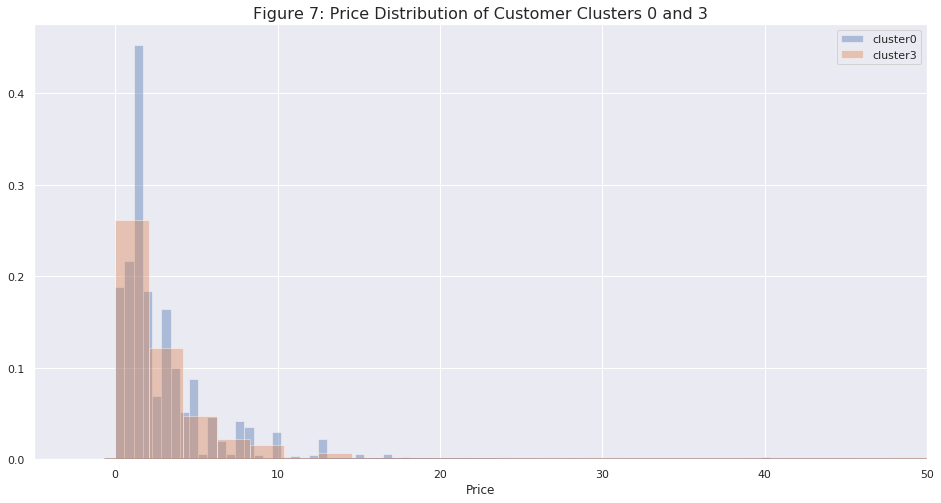

In [380]:
retail_all_cluster_df = retail_all_cluster_df.astype({"Price":'float'})
for cluster in [0,3]:
        data=retail_all_cluster_df[retail_all_cluster_df['cluster']==cluster]
        fig=sns.distplot(data['Price'],label = cluster,
        #color=sns.color_palette("bright",2),
        hist = True, kde = True,bins=2000,
                     
          )
plt.hist={'alpha':0.1}
plt.xlim(-5, 50)
plt.title('Figure 7: Price Distribution of Customer Clusters 0 and 3', fontsize=16)
plt.legend(['cluster0','cluster3'])
plt.show()

## Cluster 1 Loyal Customer Products Trend 

To further investigate customer shopping preference, we did linear regression to find the trend of top 10 most sales products (no.3) for cluster 6 customers. The sales of postage in cluster 6, which is also in overall top 10 most increasing products overall list, takes up 29% of postage sales. The plots below also show some shopping patterns in some products, such as no.6 and no.7 products which show big growth in fourth quarter, no.2 and no.4 are trendy products with gradually increasing sales amount over time. While, some products, such as no.3, no.8 and no.10 products are showing some declining.

In [127]:
cluster = customer_df_cluster['cluster']

retail_all_cluster_df=retail_all_df.merge(cluster, on='Customer ID')

retail_all_cluster_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,Date,Time,Year,Month,DofM,Weekday,WofY,QofY,HofD,cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,07:45:00,2009,12,1,1,49,4,7,1


In [128]:
def top10_prod_by_cluster(cluster_list):
    top10_prod = top10_prod_amount['StockCode'].to_list()
    for cluster in cluster_list:
        retail_all_cluster = retail_all_cluster_df[retail_all_cluster_df['cluster']==cluster]
        top10prod_cluster = retail_all_cluster.groupby(['StockCode',"Description"]).agg({"Amount":'sum',
                                                                    })['Amount'].sort_values(ascending = False).head(10)
        results = pd.DataFrame(top10prod_cluster)
        results.reset_index(inplace=True)
        print(f"Top10 products in cluster {cluster}: \n\n", results)
        
        in_top_10 = results[results['StockCode'].isin(top10_prod)]
        print(f"\n These products are also in top10 trendy products list: \n\n {in_top_10}\n")
        for prod in in_top_10['StockCode']:
            total_sales = retail_all_df[retail_all_df['StockCode'] == prod]['Amount'].sum()
    
            pct_sales = np.round(np.array((results[results['StockCode'] == prod]['Amount'])/total_sales)*100,2)
            prod_name = str((retail_all_df[retail_all_df['StockCode'] == prod]['Description']).unique())
            print(f"\n Sale of {prod_name} is {pct_sales}% of overall sales of {prod_name} \n")
        
        

In [129]:
top10_prod_by_cluster(cluster_list)

Top10 products in cluster 0: 

   StockCode                         Description    Amount
0      POST                             POSTAGE  15154.84
1    85123A  WHITE HANGING HEART T-LIGHT HOLDER  11678.90
2     22423            REGENCY CAKESTAND 3 TIER  10632.90
3    84078A    SET/4 WHITE RETRO STORAGE CUBES    8568.00
4     22086     PAPER CHAIN KIT 50'S CHRISTMAS    7556.00
5     47566                       PARTY BUNTING   6098.60
6     22138       BAKING SET 9 PIECE RETROSPOT    5745.15
7     84879       ASSORTED COLOUR BIRD ORNAMENT   5667.51
8         M                              Manual   4104.39
9     22910   PAPER CHAIN KIT VINTAGE CHRISTMAS   4100.10

 These products are also in top10 trendy products list: 

   StockCode Description    Amount
0      POST     POSTAGE  15154.84


 Sale of ['POSTAGE'] is [12.25]% of overall sales of ['POSTAGE'] 

Top10 products in cluster 1: 

   StockCode                         Description    Amount
0    85123A  WHITE HANGING HEART T-LIGHT HO

In [383]:
### cluster 6 Loyal Customer Products Trend 
retail_all_cluster = retail_all_cluster_df[retail_all_cluster_df['cluster']==6]
top10prod_cluster = retail_all_cluster.groupby(['StockCode',"Description"]).agg({"Amount":'sum',
                                                                    })['Amount'].sort_values(ascending = False).head(10)
results = pd.DataFrame(top10prod_cluster)
results.reset_index(inplace=True)
top_trends=prod_df[prod_df['StockCode'].isin(results['StockCode'])]
#top_trends.drop(1204, inplace=True)
top_trends

,StockCode,Description,Records,Coff
15,84879,15 ASSORTED COLOUR BIRD ORNAMENT 282 ...,9,0.118919
86,POST,89 POSTAGE 126 POSTAGE 173 ...,9,0.327136
91,85123A,102 WHITE HANGING HEART T-LIGHT HOLDER 1...,9,-0.106955
139,85099B,161 JUMBO BAG RED WHITE SPOTTY 320 ...,9,0.277402
464,84347,699 ROTATING SILVER ANGELS T-LIGHT HLDR ...,9,0.063063
731,47566,1329 PARTY BUNTING 2869 PARTY BUNTIN...,9,0.196322
1311,21137,3210 BLACK RECORD COVER FRAME 7885 B...,9,0.193368
3420,21623,105985 VINTAGE UNION JACK MEMOBOARD 122684 ...,8,-0.075469
3520,22423,124243 REGENCY CAKESTAND 3 TIER 125330 R...,8,0.021852
3659,82484,154861 WOOD BLACK BOARD ANT WHITE FINISH 15...,7,-0.065199


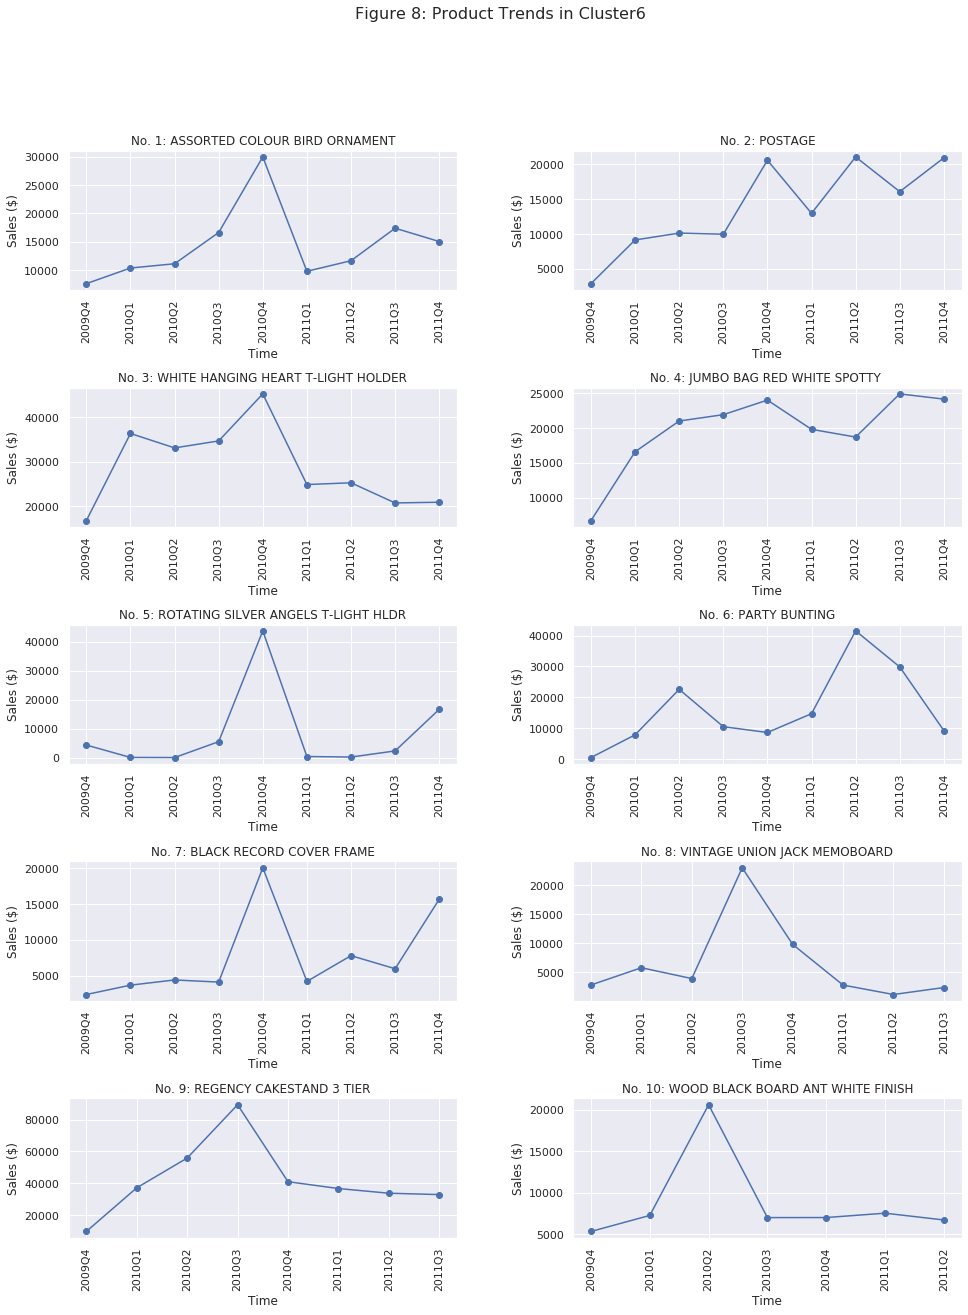

In [386]:
fig, axs = plt.subplots(5,2, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=0.3)
fig.suptitle('Figure 8: Product Trends in Cluster6', fontsize=16)

axs = axs.ravel()
i = 0
for index, row in top_trends.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    axs[i].plot(amount.values, 'bo-')
    axs[i].set_xticklabels(("","2009Q4","2010Q1","2010Q2","2010Q3","2010Q4","2011Q1","2011Q2","2011Q3","2011Q4"),
                           rotation='vertical')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Sales ($)')
    axs[i].set_title(f"No. {i+1}: {str(np.array(row['Description'])[0])}")
    i += 1

## PCA Analysis

Principal Component Analysis (PCA) is used to visualize the customer cluster in 2D space. Before doing the visualization, an accumulated bar plot shown below indicating that we can only have about 47% information preserved with 2 principle components, and 10 principle components can retain more than 90% information.

In [144]:
# choose n components
def n_components_pca(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_scaled)
    return pca, principalComponents

In [145]:
def pca_info_retain(max_number_of_components,dataframe):
    information_retained_list=[]
    for i in range(1,max_number_of_components):
        pca = PCA(n_components=i)
        principalComponents = pca.fit_transform(dataframe)
        information_retained=round(sum(pca.explained_variance_ratio_)*100,2)
        information_retained_list.append(information_retained)
        print(f"{information_retained}% information was retained by{i}components")
    return  information_retained_list

In [146]:
 information_retained_list=pca_info_retain(15,X_scaled)

34.85% information was retained by1components
47.28% information was retained by2components
57.88% information was retained by3components
66.38% information was retained by4components
72.7% information was retained by5components
77.63% information was retained by6components
81.98% information was retained by7components
85.58% information was retained by8components
88.69% information was retained by9components
91.43% information was retained by10components
93.5% information was retained by11components
95.02% information was retained by12components
96.12% information was retained by13components
96.99% information was retained by14components


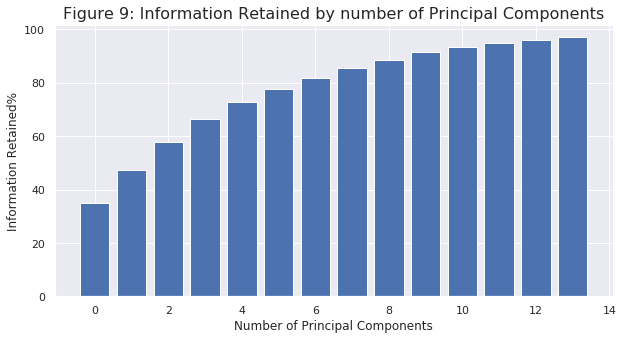

In [358]:
plt.figure(figsize=(10,5))
fig = plt.bar(range(0,14), information_retained_list)
plt.title('Figure 9: Information Retained by number of Principal Components',Fontsize = 16)
plt.xlabel('Number of Principal Components')
plt.ylabel('Information Retained%')
plt.show()

In [361]:
def plot_customer_cluster_pca():
    plt.figure(figsize=(15,10))
    sns.scatterplot(x="PC1",
                y="PC2",
                data=selected_principalComponents_join_label_id,
                hue='cluster',
                palette=sns.color_palette("bright", 4),alpha=0.6)
    
    plt.title("Figure 10: Visualization of Custermor Clusters by PCA", Fontsize = 16)


In [162]:
# choose 2 components
pca, principalComponents=n_components_pca(2)

In [163]:
#add customer ID and cluster columns to principalComponents 
principalComponents_join_label_id=pd.DataFrame(principalComponents).join(customer_df_cluster.reset_index()[['Customer ID','cluster']])

#select certain cluster data cluster 0,1,3,4 with customer more than 100
selcted_cluster=[0,1,3,6]
selected_principalComponents_join_label_id=principalComponents_join_label_id[principalComponents_join_label_id['cluster'].isin(selcted_cluster)]
selected_principalComponents_join_label_id.columns=['PC1', 'PC2', 'Customer ID', 'cluster']
selected_principalComponents_join_label_id.head()

,PC1,PC2,Customer ID,cluster
1,1.958426,-0.138839,12347.0,1
2,0.168168,0.057005,12348.0,1
3,0.317352,0.329815,12349.0,1
4,-2.372055,-0.165859,12350.0,3
5,-2.304164,-0.153703,12351.0,3


Scatter plots (Figure 9) below shows different customer clusters in different colors. By using 2 principle components from PCA, cluster0 and cluster 3 are greatly overlaped. There are also some outliers in each cluster, especially in cluster 6 (business customer).

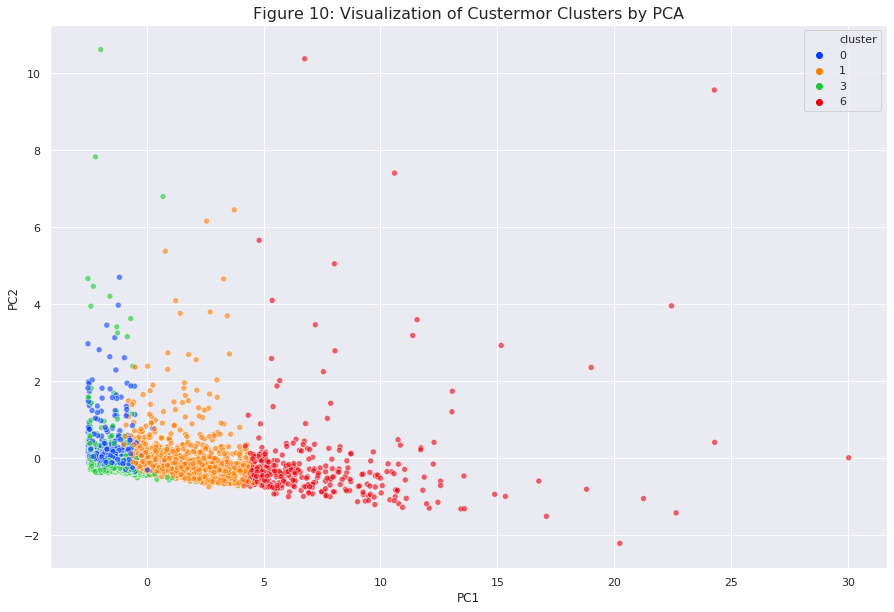

In [362]:
plot_customer_cluster_pca()

In [155]:
# select 10 principal components by pca toreduce the number of dimensions before feeding the data into the t-SNE algorithm
pca, principalComponents=n_components_pca(10)

In [156]:
#add customer ID and cluster columns to principalComponents 
principalComponents_join_label_id=pd.DataFrame(principalComponents).join(customer_df_cluster.reset_index()[['Customer ID','cluster']])

#select certain cluster data cluster 0,1,3,9 with customer more than 100
selcted_cluster=[0,1,3,9]
selected_principalComponents_join_label_id=principalComponents_join_label_id[principalComponents_join_label_id['cluster'].isin(selcted_cluster)]                                                                                                      
selected_principalComponents_join_label_id.head()

,0,1,2,3,4,5,6,7,8,9,Customer ID,cluster
1,1.958426,-0.138839,-1.706532,0.235845,-0.394729,-0.006070,0.318865,0.018549,-0.088907,-0.187452,12347.0,1
2,0.168168,0.057005,-1.996892,0.107217,2.045856,-0.187175,-0.328352,-0.033975,-0.100087,-0.093623,12348.0,1
3,0.317352,0.329815,-0.498471,0.268024,-1.909747,0.999512,-0.071119,0.533538,-0.067287,-0.408838,12349.0,1
4,-2.372055,-0.165859,1.895652,-0.273415,2.575172,-0.335690,-0.420950,-0.202989,0.003113,0.141921,12350.0,3
5,-2.304164,-0.153703,1.867357,-0.250396,1.767912,-0.134489,-0.318595,-0.252109,0.008740,0.057768,12351.0,3


In [157]:
# fit TENE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(principalComponents)

# build dataframe of tsne results
df_tsne=pd.DataFrame(tsne_pca_results[:,0], columns=['tsne-2d-one']).join(pd.DataFrame(tsne_pca_results[:,1], columns=['tsne-2d-two']))

#add customer ID and cluster columns to df_tsne
df_tsne_join_label_id=pd.DataFrame(df_tsne).join(customer_df_cluster.reset_index()[['Customer ID','cluster']])

#select certain cluster data cluster 0,1,3,6 with customer more than 100
selcted_cluster=[0,1,3,6]
selected_df_tsne_join_label_id=df_tsne_join_label_id[df_tsne_join_label_id['cluster'].isin(selcted_cluster)]                                                                                                      
selected_df_tsne_join_label_id.head()

,tsne-2d-one,tsne-2d-two,Customer ID,cluster
1,-0.592282,-8.445827,12347.0,1
2,2.632557,-5.466864,12348.0,1
3,-4.870257,1.686063,12349.0,1
4,15.188410,-1.900054,12350.0,3
5,11.051647,7.147081,12351.0,3


T-SNE could show customer clusters with 10 principle components which represent more than 90% of information. With this k-means model, there are some impurities between cluster 0, cluster 1 and cluster 3 at the edges. Overall, this model could nicely seperate customers into 4 major clusters.

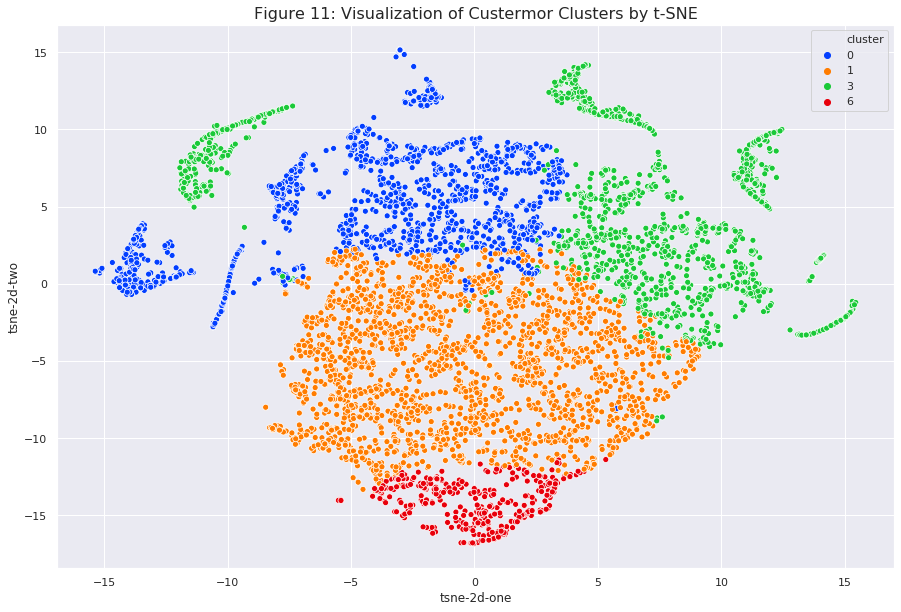

In [363]:
# plot tsne
plt.figure(figsize=(15,10))
fig = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=selected_df_tsne_join_label_id['cluster'],
    palette=sns.color_palette("bright", 4),
    data=selected_df_tsne_join_label_id,
    legend="full",
    alpha=1
)
plt.title("Figure 11: Visualization of Custermor Clusters by t-SNE", Fontsize = 16)
plt.show()

# Conclusion

In this project, we have conducted data analytics on the historical transaction data of a online retail. We have cleaned the data and utilized regression, clustering, visualization methods to get insight into the products and customers. The results provided actionable insights for the retailer in order to better engage the customer and preparing the stocks. 

By understanding the product sales trends, the retailed will be well prepared in the stock planning and prioritize the resources.

By segmenting the users into groups, the retailer will provide better and accurate services through targeted advertisement and engagement, and therefore provide extraordinary experience for their customers. This will provide competitive edge for the retailer in the highly competitive environment. 



# References

* Chen, D. Sain, S.L., and Guo, K. (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208. 

* Chen, D., Guo, K. and Ubakanma, G. (2015), Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, Vol. 2, No. 1, pp.1-18.

* Chen, D., Guo, K., and Li, Bo (2019), Predicting Customer Profitability Dynamically over Time: An Experimental Comparative Study, 24th Iberoamerican Congress on Pattern Recognition (CIARP 2019), Havana, Cuba, 28-31 Oct, 2019. 

* Laha Ale, Ning Zhang, Huici Wu, Dajiang Chen, and Tao Han, Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE Internet of Things Journal, Vol. 6, Issue 3, pp. 5520-5530, 2019.

* Rina Singh, Jeffrey A. Graves, Douglas A. Talbert, William Eberle, Prefix and Suffix Sequential Pattern Mining, Industrial Conference on Data Mining 2018: Advances in Data Mining. Applications and Theoretical Aspects, pp. 309-324. 2018. 

